# 線形モデル

In [62]:
import mglearn
import mglearn.datasets as mgdata # cachedir='cache' を location='cache'に変更
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import LinearSVC # 線形サポートベクタマシン
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer # 癌患者情報

C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


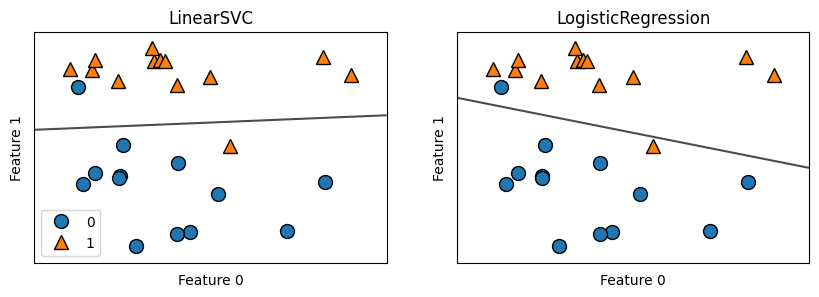

In [63]:
# 決定境界の可視化
X, y = mgdata.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) # 第1引数:X値 第2引数:Y値 第3引数:分類ラベル 第4引数:作画情報
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

ラインより上はクラス1 下はクラス0 に分類される。  
X軸 第一特徴量  Y軸 第二特徴量  
どちらとも L2正則化を行っている。

正則化の強度を決定するハイパーパラメータ C がある。  
C が大きくなると正則化は弱くなり、小さくすると係数を0に近づけようとする。

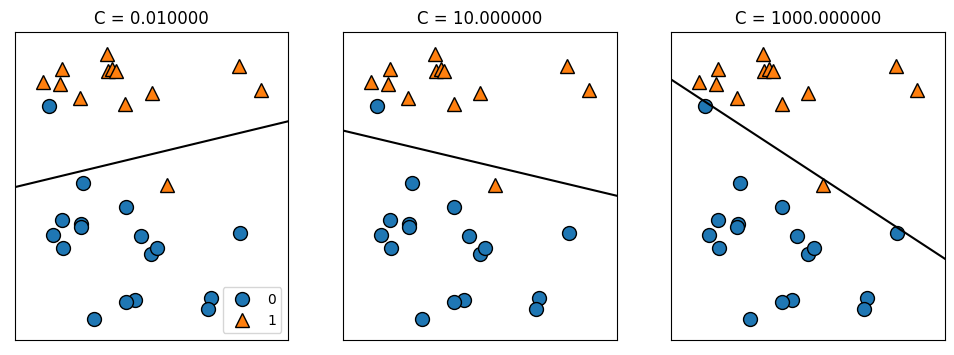

In [64]:
# SVC Cによる違い
mglearn.plots.plot_linear_svc_regularization()

一番右の C が一番大きい場合は決定境界の傾きがかなり急になり、すべてのクラスを正しく分類しようとしている。  
クラス1の1つは分類不可能。  
一番右は過剰適合を起こしている。

In [91]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train) # max_iter を指定しないとエラー 最大反復回数不足 (max_iter=3000)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) # 訓練セット
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test))) # テストセット

Training set score: 0.958
Test set score: 0.958


訓練、テスト共に95%以上の精度と良い結果が出ているが、訓練とテストの結果が近いという事は適合不足が起こっている可能性がある。  
Cの値を変更して適合の調整を行う。

In [92]:
logreg100 = LogisticRegression(C=100, max_iter=3000).fit(X_train, y_train) # max_iter を指定しないとエラー 最大反復回数不足
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) # 訓練セット
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test))) # テストセット

Training set score: 0.984
Test set score: 0.965


C=100 にすると訓練、テストともに精度が向上している。  
Cの値は値が大きいほど正則化が弱く複雑なモデルとなるため、複雑なモデルほど精度が高い事になる。

In [93]:
logreg0001 = LogisticRegression(C=0.0001, max_iter=3000).fit(X_train, y_train) # max_iter を指定しないとエラー 最大反復回数不足
print("Training set score: {:.3f}".format(logreg0001.score(X_train, y_train))) # 訓練セット
print("Test set score: {:.3f}".format(logreg0001.score(X_test, y_test))) # テストセット

Training set score: 0.930
Test set score: 0.930


先ほどとは逆にCの値を小さくし、正規化を強くした。  
単純なモデルとなったが、訓練、テストともに精度が低くなっている。

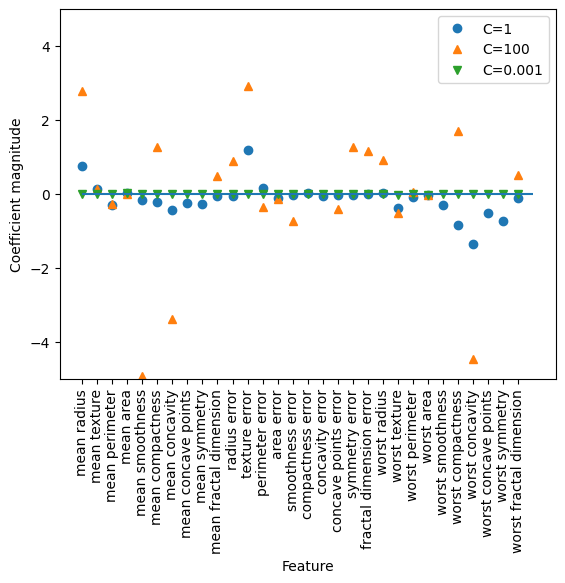

In [94]:
# ロジスティック回帰を行った際の係数(L2 正規化)
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg0001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

LogisticRegression(ロジスティック回帰)はデフォルトではL2正規化を行う。  
3番目の特徴量 [mean perimeter] に対する係数が、C=100, 1 に対しては不だが C=0.01に対しては正となっている。  
このようにクラス分類に対しどの係数が影響を与えているかを考えておかなければならない。

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


C:\Users\Kutinasi\Desktop\Program\python\PythonOreilly\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


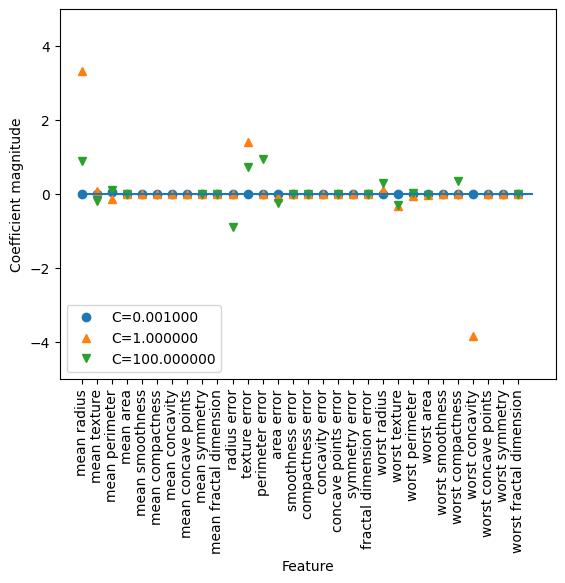

In [95]:
# L1正規化の場合
for C, market in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(X_train, y_train) # solver(最適化関数)=lbfgs(L-BFGS法) がデフォになっているためliblinear(座標降下法)に変更 lbfgsはL1に対応していない
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train))) # 訓練セット
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test))) # テストセット
    plt.plot(lr_l1.coef_.T, market, label="C={:3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)

L2正規化に対して、特徴量に対する係数が減っているのが確認できます。  
回帰分析と同じように penalty パラメータに L1正規化 または L2正規化 を指定して特徴量の使用量を変更するかどうかでモデルへの影響を与えている。